<a href="https://colab.research.google.com/github/tanishqfinds/kaggle/blob/main/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
test=pd.read_csv('/content/drive/MyDrive/Kaggle/titanic/Data/test.csv')
train=pd.read_csv('/content/drive/MyDrive/Kaggle/titanic/Data/train.csv')

In [116]:
train.head()
train=train.drop(['Name','Ticket','Fare','Cabin'],axis=1)
train=train[train['Embarked'].notnull()]




In [94]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [117]:
train['Embarked'].isnull().sum()

np.int64(0)

In [118]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Embarked,0


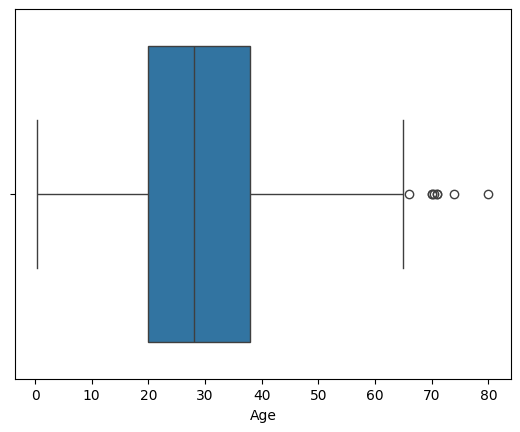

In [119]:
sns.boxplot(x=train['Age'])
plt.show()

<Axes: xlabel='Age'>

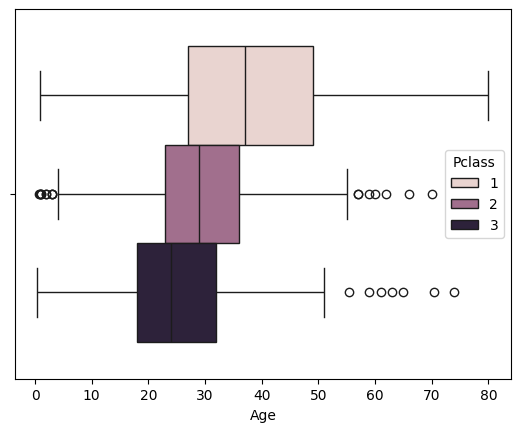

In [120]:
sns.boxplot(data=train,x='Age',hue='Pclass')

In [121]:
train[train['Pclass']==1]['Age'].mean()
train[train['Pclass']==2]['Age'].median()
train[train['Pclass']==3]['Age'].median()

train.loc[train['Pclass']==1,'Age']=train.loc[train['Pclass']==1,'Age'].fillna(27.915708812260537)
train.loc[train['Pclass']==2,'Age']=train.loc[train['Pclass']==2,'Age'].fillna(29)
train.loc[train['Pclass']==3,'Age']=train.loc[train['Pclass']==3,'Age'].fillna(24)


In [122]:
train['Age'].isnull().sum()

np.int64(0)

In [123]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [124]:
le=LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])

In [126]:
ohe=OneHotEncoder(sparse_output=False)
enc=ohe.fit_transform(train[['Embarked']])
# 3. Convert to DataFrame
encoded_df = pd.DataFrame(enc, columns=ohe.get_feature_names_out(['Embarked']))

# 4. Align indexes
encoded_df.index = train.index

# 5. Drop the original 'Embarked' column
train = train.drop('Embarked', axis=1)

# 6. Concatenate the new encoded columns
train = pd.concat([train, encoded_df], axis=1)


In [127]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,0.0,0.0,1.0
1,2,1,1,0,38.0,1,0,1.0,0.0,0.0
2,3,1,3,0,26.0,0,0,0.0,0.0,1.0
3,4,1,1,0,35.0,1,0,0.0,0.0,1.0
4,5,0,3,1,35.0,0,0,0.0,0.0,1.0
